Mean Squared Error: 0.12407494704826479


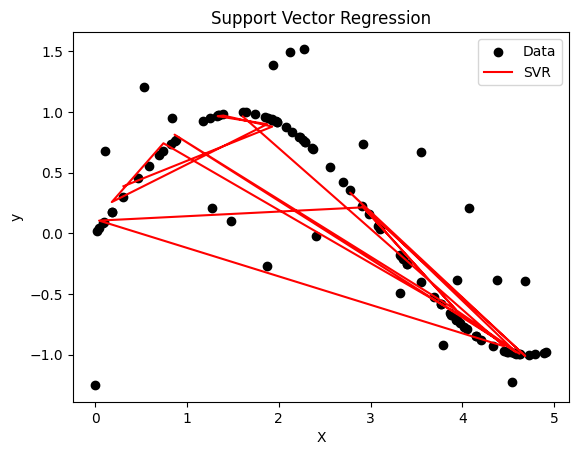

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate sample data
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # Generate 100 data points in increasing order
y = np.sin(X).ravel()  # Generate y values based on the sine function

# Add noise to targets (every 5th data point)
y[::5] += 3 * (0.5 - np.random.rand(20))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
sc_X = StandardScaler()  # Standardize the features
sc_y = StandardScaler()  # Standardize the target variable
X_train = sc_X.fit_transform(X_train)  # Fit and transform X_train
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))  # Fit and transform y_train

# Train the Support Vector Regression model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Create SVR model with specified parameters
svr.fit(X_train, y_train.ravel())  # Fit SVR model to the standardized training data

# Make predictions on the test set
y_pred = svr.predict(sc_X.transform(X_test))  # Transform X_test and predict y values

# Inverse transform to get original scale
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))  # Inverse transform predicted y values
y_test = sc_y.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform actual y values

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
print('Mean Squared Error:', mse)

# Plot the results
plt.scatter(X, y, color='black', label='Data')  # Plot original data points
plt.plot(X_test, y_pred, color='red', label='SVR')  # Plot SVR predictions
plt.xlabel('X')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Support Vector Regression')  # Title for the plot
plt.legend()  # Add legend to the plot
plt.show()  # Show the plot
